# Performing EDA & Predictive analysis on Indian weather data


### This notebook includes:
 - Data preprocessing
 - EDA to understand the data
 - Understanding Statewise data 
 - Comparing various models to predict temparature.

### Importing Data and necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("IndianWeatherRepository.csv")  #loading the dataset

In [3]:
df.head()  #by default top 5 rows

country location_name          region  latitude  longitude      timezone  \
0   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1   India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2   India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3   India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4   India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693286100  2023-08-29 10:45                 27.5   
1          1693286100  2023-08-29 10:45                 27.5   
2          1693286100  2023-08-29 10:45                 26.3   
3          1693286100  2023-08-29 10:45                 25.6   
4          1693286100  2023-08-29 10:45                 27.2   

   temperature_fahrenheit  ... air_quality_PM2.5  air_quality_PM10  \
0                    81.5  ...              12.6              18.5   
1                    81.5  ...              10.7              14.2   
2                    79.3  ...              16.8              20.7   
3                    78.1  ...               4.9               6.6   
4                    81.0  ...              11.4              14.8   

   air_quality_us-epa-index  air_quality_gb-defra-index   sunrise    sunset  \
0                         1                           2  05:59 AM  06:41 PM   
1                         1                           1  06:00 AM  06:40 PM   
2                         2                           2  05:56 AM  06:34 PM   
3                         1                           1  06:00 AM  06:38 PM   
4                         1                           1  06:01 AM  06:39 PM   

   moonrise   moonset      moon_phase  moon_illumination  
0  05:42 PM  03:38 AM  Waxing Gibbous                 93  
1  05:39 PM  03:41 AM  Waxing Gibbous                 93  
2  05:32 PM  03:39 AM  Waxing Gibbous                 93  
3  05:36 PM  03:43 AM  Waxing Gibbous                 93  
4  05:38 PM  03:42 AM  Waxing Gibbous                 93  

[5 rows x 42 columns]

In [4]:
df.tail() #y default last 5 rows 

country location_name         region  latitude  longitude      timezone  \
15863   India        Niwari  Uttar Pradesh     28.88      77.53  Asia/Kolkata   
15864   India       Saitual        Mizoram     23.97      92.58  Asia/Kolkata   
15865   India       Ranipet     Tamil Nadu     12.93      79.33  Asia/Kolkata   
15866   India       Tenkasi     Tamil Nadu      8.97      77.30  Asia/Kolkata   
15867   India        Pendra    Maharashtra     21.93      74.15  Asia/Kolkata   

       last_updated_epoch      last_updated  temperature_celsius  \
15863          1695680100  2023-09-26 03:45                 27.0   
15864          1695680100  2023-09-26 03:45                 21.3   
15865          1695680100  2023-09-26 03:45                 25.6   
15866          1695680100  2023-09-26 03:45                 22.1   
15867          1695680100  2023-09-26 03:45                 23.4   

       temperature_fahrenheit  ... air_quality_PM2.5  air_quality_PM10  \
15863                    80.6  ...             283.4             402.8   
15864                    70.4  ...              16.3              17.0   
15865                    78.0  ...               6.0               8.8   
15866                    71.8  ...               4.1               4.9   
15867                    74.1  ...              33.7              36.0   

       air_quality_us-epa-index  air_quality_gb-defra-index   sunrise  \
15863                         6                          10  06:09 AM   
15864                         2                           2  05:09 AM   
15865                         1                           1  06:02 AM   
15866                         1                           1  06:10 AM   
15867                         2                           3  06:23 AM   

         sunset  moonrise   moonset      moon_phase  moon_illumination  
15863  06:13 PM  03:42 PM  01:08 AM  Waxing Gibbous                 74  
15864  05:14 PM  02:28 PM  12:17 AM  Waxing Gibbous                 74  
15865  06:07 PM  03:00 PM  01:38 AM  Waxing Gibbous                 74  
15866  06:15 PM  03:01 PM  01:55 AM  Waxing Gibbous                 74  
15867  06:27 PM  03:40 PM  01:40 AM  Waxing Gibbous                 74  

[5 rows x 42 columns]

In [5]:
df.info()  # information about datset including columns, non null count, dtype range, memory,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15868 entries, 0 to 15867
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       15868 non-null  object 
 1   location_name                 15868 non-null  object 
 2   region                        15868 non-null  object 
 3   latitude                      15868 non-null  float64
 4   longitude                     15868 non-null  float64
 5   timezone                      15868 non-null  object 
 6   last_updated_epoch            15868 non-null  int64  
 7   last_updated                  15868 non-null  object 
 8   temperature_celsius           15868 non-null  float64
 9   temperature_fahrenheit        15868 non-null  float64
 10  condition_text                15868 non-null  object 
 11  wind_mph                      15868 non-null  float64
 12  wind_kph                      15868 non-null  float64
 13  w

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()  # basic stastistical values like mean, median, min, max

latitude     longitude  last_updated_epoch  temperature_celsius  \
count  15868.000000  15868.000000        1.586800e+04         15868.000000   
mean      23.101816     80.237048        1.694477e+09            24.765314   
std        5.795698      5.758379        7.197810e+05             3.794186   
min        8.080000     68.970000        1.693286e+09            -4.200000   
25%       20.270000     76.070000        1.693870e+09            23.400000   
50%       23.970000     78.670000        1.694473e+09            25.000000   
75%       26.770000     83.900000        1.695077e+09            27.000000   
max       34.570000     95.800000        1.695680e+09            38.300000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            15868.000000  15868.000000  15868.000000  15868.000000   
mean                76.577659      5.900649      9.499943    186.721830   
std                  6.829476      3.452184      5.550549     97.487885   
min                 24.500000      2.200000      3.600000      1.000000   
25%                 74.000000      3.100000      5.000000     94.000000   
50%                 77.100000      5.100000      8.300000    213.000000   
75%                 80.600000      7.600000     12.200000    267.000000   
max                100.900000     25.700000     41.400000    360.000000   

        pressure_mb   pressure_in  ...      gust_kph  \
count  15868.000000  15868.000000  ...  15868.000000   
mean    1005.344845     29.687027  ...     15.856201   
std        3.065070      0.090421  ...      8.631677   
min      997.000000     29.440000  ...      0.000000   
25%     1003.000000     29.620000  ...      9.700000   
50%     1005.000000     29.680000  ...     14.800000   
75%     1007.000000     29.740000  ...     20.800000   
max     1021.000000     30.140000  ...     71.600000   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                 15868.000000       15868.000000   
mean                    534.627426          25.708401   
std                     459.515519          21.540349   
min                     113.500000           0.000000   
25%                     263.700000          10.500000   
50%                     407.200000          21.500000   
75%                     674.300000          35.100000   
max                   11642.500000         171.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                  15868.000000                 15868.000000   
mean                       8.442267                     4.893849   
std                        8.908646                    12.246430   
min                        0.000000                     0.000000   
25%                        3.000000                     0.800000   
50%                        5.700000                     2.100000   
75%                       10.900000                     4.900000   
max                      141.200000                   541.700000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count       15868.000000      15868.000000              15868.000000   
mean           38.170582         46.212635                  2.114885   
std            49.061351         56.859891                  1.189849   
min             0.500000          0.700000                  1.000000   
25%             8.700000         11.500000                  1.000000   
50%            21.750000         27.800000                  2.000000   
75%            49.300000         59.425000                  3.000000   
max           899.500000       1043.700000                  6.000000   

       air_quality_gb-defra-index  moon_illumination  
count                15868.000000       15868.000000  
mean                     3.787056          46.595727  
std                      3.271611          35.741011  
min                      1.000000           0.000000  
25%                      1.000000          14.000000  
50%                  

In [9]:
df.describe(include='object')

country location_name         region      timezone      last_updated  \
count    15868         15868          15868         15868             15868   
unique       1           543             33             3               116   
top      India       Udaipur  Uttar Pradesh  Asia/Kolkata  2023-09-01 05:15   
freq     15868            54           1772         15781               541   

       condition_text wind_direction   sunrise    sunset     moonrise  \
count           15868          15868     15868     15868        15868   
unique             29             16       120       134         1408   
top             Clear            WSW  06:07 AM  06:24 PM  No moonrise   
freq             3484           2152       437       328          549   

           moonset       moon_phase  
count        15868            15868  
unique        1418                8  
top     No moonset  Waxing Crescent  
freq           545             3837

In [10]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

# Data preprocessing 


In [11]:
# Creating separate dataset for data containing numeric data for analysis
weather_df= df.select_dtypes(include = 'number')
cols = weather_df.columns.values
cols

array(['latitude', 'longitude', 'last_updated_epoch',
       'temperature_celsius', 'temperature_fahrenheit', 'wind_mph',
       'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index',
       'moon_illumination'], dtype=object)

In [12]:
#Removing redundant columns [such as temperature in celsius & fahrenheit]

weather_df.drop(['temperature_fahrenheit','wind_mph','pressure_in','precip_mm','feels_like_fahrenheit','visibility_km','gust_mph'], axis=1,inplace=True)
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Understanding the data using histogram 

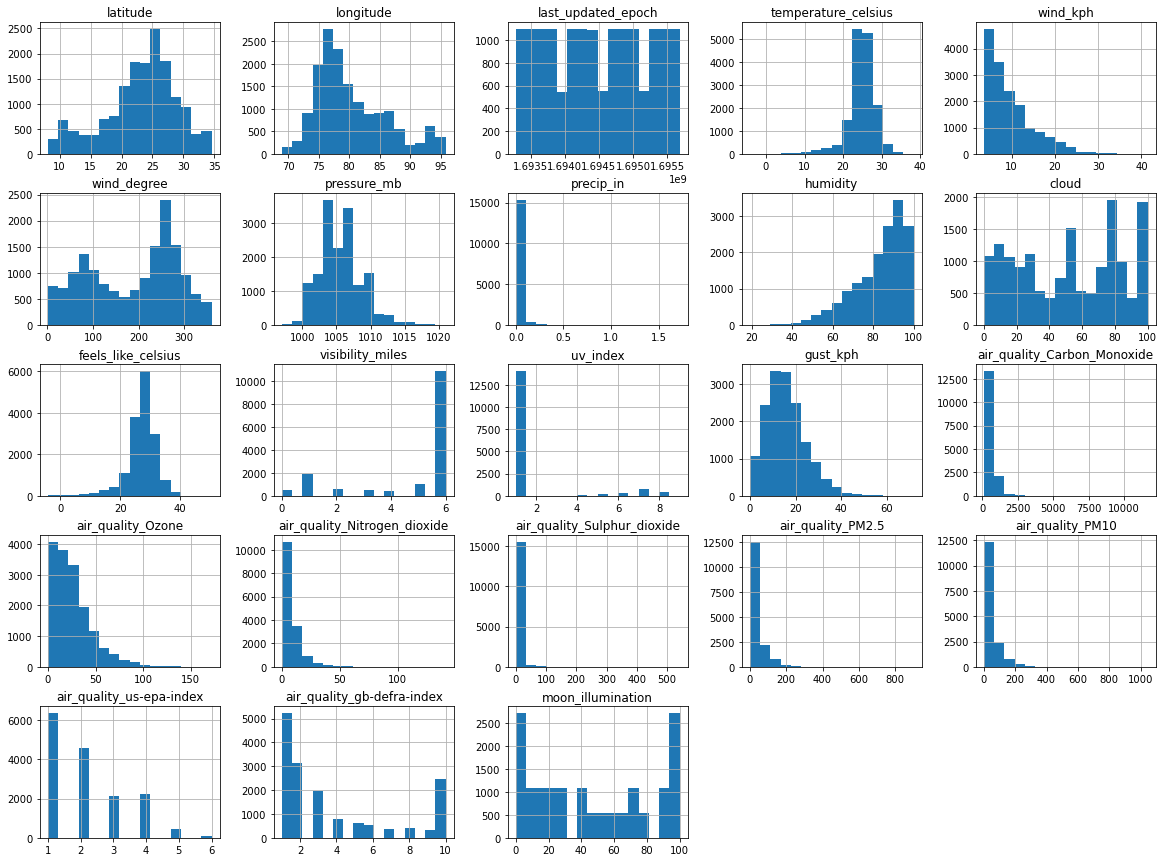

In [13]:
weather_df.hist(bins=16, figsize=(20,15));

# Determining correlation between various fields

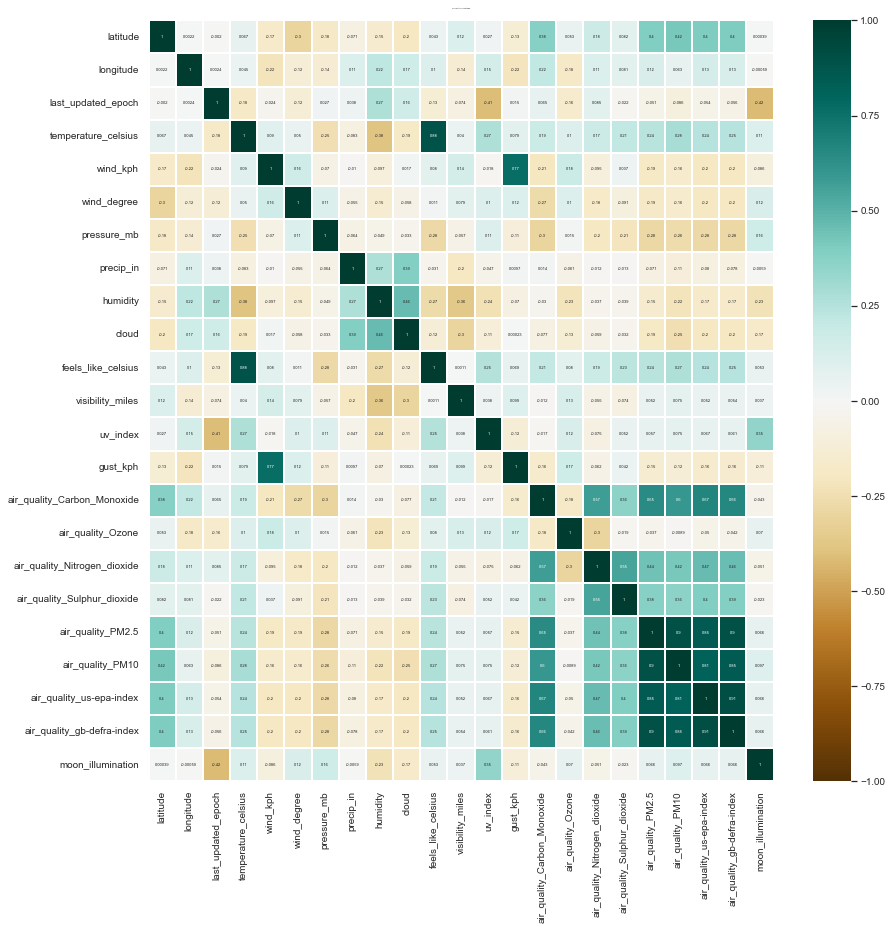

In [14]:
#Creating a correlation matrix
sns.set(font_scale=0.9) # showing relationship b/w columns to columns

corr_matrix = weather_df.corr(method="kendall")

plt.figure(figsize=(14, 14))
heatmap= sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True,cmap='BrBG',annot_kws={"fontsize":4},linewidths=0.1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':2}, pad=12);


In [15]:
sorted_corr_mat = corr_matrix.abs().unstack().sort_values()
sorted_corr_mat = sorted_corr_mat.to_frame(name="Correlation")

# Removing highly/ least correlated data (correlation>0.90 && <0.05)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']>0.95].index)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']<0.05].index)
print("Fields with max correlation are:\n")

sorted_corr_mat[sorted_corr_mat['Correlation']>0.80]

Fields with max correlation are:



Correlation
air_quality_us-epa-index   air_quality_PM10               0.813988
air_quality_PM10           air_quality_us-epa-index       0.813988
air_quality_us-epa-index   air_quality_PM2.5              0.846265
air_quality_PM2.5          air_quality_us-epa-index       0.846265
air_quality_gb-defra-index air_quality_PM10               0.850298
air_quality_PM10           air_quality_gb-defra-index     0.850298
feels_like_celsius         temperature_celsius            0.882876
temperature_celsius        feels_like_celsius             0.882876
air_quality_PM2.5          air_quality_gb-defra-index     0.897770
air_quality_gb-defra-index air_quality_PM2.5              0.897770
air_quality_PM10           air_quality_PM2.5              0.898110
air_quality_PM2.5          air_quality_PM10               0.898110
air_quality_gb-defra-index air_quality_us-epa-index       0.906540
air_quality_us-epa-index   air_quality_gb-defra-index     0.906540

# Understanding State-wise trend of air quality indices

In [17]:
import plotly.express as px

In [18]:
# Average PM2.5 exposure

fig1=px.bar(df.groupby('region')['air_quality_PM2.5'].mean().reset_index(),
           x='region', y='air_quality_PM2.5', 
           title='Average PM2.5 by State')
fig1.show()

In [19]:
# Average UV exposure

fig2=px.bar(df.groupby('region')['uv_index'].mean().reset_index(), x='region', y='uv_index', title='Average uv_index exposure by State')
fig2.show()

In [20]:
# UV index scatterplot
fig3 = px.scatter(df, x='uv_index', y='temperature_celsius', color='region',
                 title='Correlation Between UV Index and Temperature by Region',
                 labels={'uv_index': 'UV Index', 'temperature_celsius': 'Temperature (Celsius)'})

fig3.update_layout(xaxis_title='UV Index', yaxis_title='Temperature (Celsius)')

fig3.show()

In [21]:
# Temperature 
fig4=px.bar(df.groupby('region')['temperature_celsius'].mean().reset_index(), x='region', y='temperature_celsius', title='Average temperature exposure by State')
fig4.show()

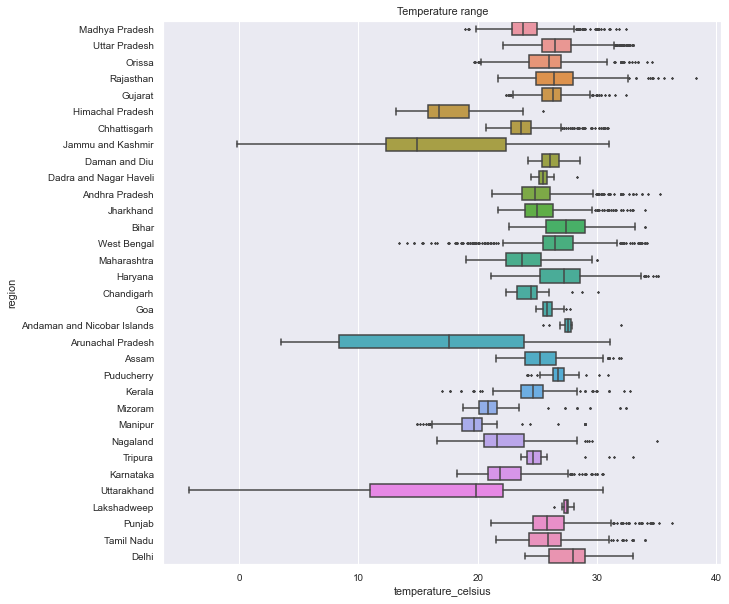

In [22]:
# Temperature range
plt.figure(figsize=(10, 10))
temp_range=sns.boxplot(data=df, y='region', x='temperature_celsius', 
                       flierprops={'marker': '*', 'markersize': 2, 'markerfacecolor': 'blue'})
temp_range.set_title("Temperature range")

plt.show()

# Ploting Temperature vs various air quality metrices (Scaled)

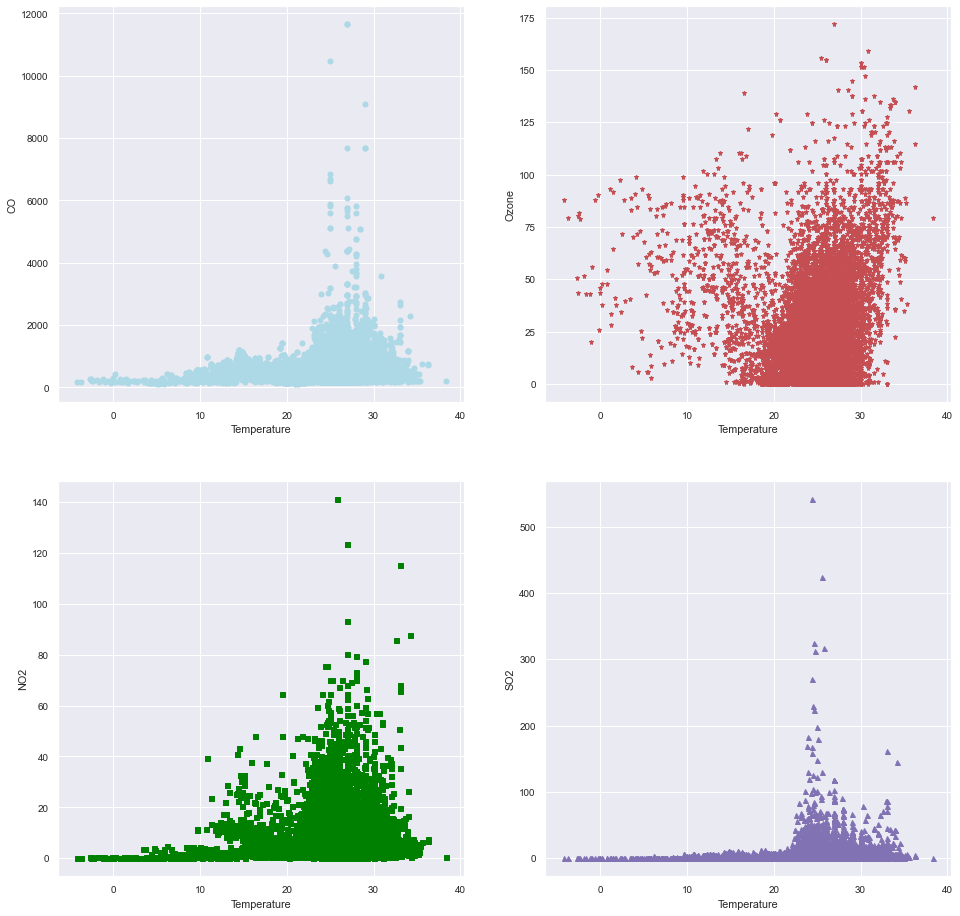

In [23]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

temp_weather=df


# Scatter Plots for Air Quality Metrics vs Temperature
air_quality_metrics = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 
                       'air_quality_Sulphur_dioxide']

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot( "temperature_celsius","air_quality_Carbon_Monoxide", data=temp_weather,color="lightblue",marker='o',ms="5",ls = '',label="CO")
plt.xlabel("Temperature")
plt.ylabel("CO")

plt.subplot(2, 2, 2)
plt.plot( "temperature_celsius","air_quality_Ozone", data=temp_weather,color="r",marker='*',ms="5",ls = '',label="Ozone")
plt.xlabel("Temperature")
plt.ylabel("Ozone")

plt.subplot(2, 2, 3)
plt.plot( "temperature_celsius","air_quality_Nitrogen_dioxide", data=temp_weather,color="green",marker='s',ms="5",ls = '',label="NO2")
plt.xlabel("Temperature")
plt.ylabel("NO2")

plt.subplot(2, 2, 4)
plt.plot( "temperature_celsius","air_quality_Sulphur_dioxide", data=temp_weather,color="m",marker='^',ms="5",ls = '',label="SO2")
plt.xlabel("Temperature")
plt.ylabel("SO2")

plt.show()

In [24]:
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Comparing various models that can be used to predict temparature


As temperature depend on various factors like latitude, longitude, wind, rain, humidity etc, we will be considering these fields only.

In [25]:
temperature_data = weather_df['temperature_celsius']
temperature_factors = weather_df[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

In [26]:
from sklearn.model_selection import train_test_split # train=70%, test=30%
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(temperature_factors, temperature_data, test_size = 0.3, random_state = 1)

In [27]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (11107, 8)
X_test: (4761, 8)
Y_train: (11107,)
Y_test: (4761,)


# Model 1 : MultiLinear Regression

In [28]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

y_pred= mlr.predict(x_test)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(mlr_diff.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'MLR','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
mlr_acc = pd.DataFrame(d)
display(mlr_acc)
import pickle
pickle.dump(mlr, open('MLR.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2        23.198432
286            32.0        29.149722
11243          24.9        25.403782
1892           24.8        25.529912
14566          23.3        22.025432

R squared: 51.22
Mean Absolute Error: 1.9708937369944304
Mean Square Error: 7.1858232079907145
Root Mean Square Error: 2.680638582127534


Algorithm       MAE       MSE      RMSE                 R2
0       MLR  1.970894  7.185823  2.680639  51.22474934814463

Model Saved


# Model 2 : LASSO Regression

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred= lasso.predict(x_test)

lasso_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(lasso_diff.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'Lasso','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
lasso_acc = pd.DataFrame(d)
display(lasso_acc)
import pickle
pickle.dump(lasso, open('lasso.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2        23.209890
286            32.0        28.467446
11243          24.9        25.546425
1892           24.8        25.525402
14566          23.3        22.490611

R squared: 49.16
Mean Absolute Error: 1.9336931928615484
Mean Square Error: 7.489487552786068
Root Mean Square Error: 2.7366928130110013


Algorithm       MAE       MSE      RMSE                 R2
0     Lasso  1.933693  7.489488  2.736693  49.16356524957754

Model Saved


# Model 3: Decision Tree Based Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1,max_depth=12)
dt.fit(x_train, y_train)

y_pred= dt.predict(x_test)

dt_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(dt_diff.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'DTR','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
dt_acc = pd.DataFrame(d)
display(dt_acc)
import pickle
pickle.dump(dt, open('dt.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2        24.326923
286            32.0        31.662500
11243          24.9        25.800000
1892           24.8        24.757143
14566          23.3        22.140404

R squared: 88.31
Mean Absolute Error: 0.8596984797471393
Mean Square Error: 1.7220635386578755
Root Mean Square Error: 1.3122741857774523


Algorithm       MAE       MSE      RMSE                 R2
0       DTR  0.859698  1.722064  1.312274  88.31114010110122

Model Saved


# Model 4: Random Forest 

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x_train, y_train)

y_pred= rf.predict(x_test)

rf_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(rf_diff.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'RF','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
rf_acc = pd.DataFrame(d)
display(rf_acc)
import pickle
pickle.dump(rf, open('rf.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2           23.115
286            32.0           32.000
11243          24.9           25.865
1892           24.8           24.099
14566          23.3           22.482

R squared: 94.18
Mean Absolute Error: 0.5972621578099842
Mean Square Error: 0.8574493835576095
Root Mean Square Error: 0.9259856281593195


Algorithm       MAE       MSE      RMSE                R2
0        RF  0.597262  0.857449  0.925986  94.1798862296258

Model Saved


# Model 5: SGD

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn import metrics

gradient_booster = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.1, random_state=100,
    max_features=5, loss='ls')  # Change loss to 'ls'

gradient_booster.fit(x_train, y_train)

y_pred = gradient_booster.predict(x_test)

gradient_booster_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(gradient_booster_diff.head())

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'Gradient Booster','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
gradient_booster_acc = pd.DataFrame(d)
display(gradient_booster_acc)

import pickle
pickle.dump(gradient_booster, open('gradient_booster.sav', 'wb'))
print("Model Saved")


Actual value  Predicted value
13559          22.2        24.202790
286            32.0        31.556851
11243          24.9        25.514195
1892           24.8        23.938090
14566          23.3        22.234717

R squared: 91.73
Mean Absolute Error: 0.7968937294207128
Mean Square Error: 1.2180033571676436
Root Mean Square Error: 1.103631893870254


Algorithm       MAE       MSE      RMSE                 R2
0  Gradient Booster  0.796894  1.218003  1.103632  91.73255209304477

Model Saved


# KNN

In [33]:
# Create an object (model)
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 2)

# Fit (train) the model
knn.fit(x_train, y_train)

# New Data prediction
y_pred = knn.predict(x_test)

# Keeping Actual and prediction data
knn_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(knn_df.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'KNN','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
knn_acc = pd.DataFrame(d)
display(knn_acc)
import pickle
pickle.dump(knn, open('knn.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2            26.00
286            32.0            32.00
11243          24.9            25.95
1892           24.8            24.50
14566          23.3            20.20

R squared: 71.31
Mean Absolute Error: 1.1619827767275783
Mean Square Error: 4.2272936357908
Root Mean Square Error: 2.0560383351948475


Algorithm       MAE       MSE      RMSE                 R2
0       KNN  1.161983  4.227294  2.056038  71.30637636124881

Model Saved


# SVM

In [34]:
# Create an object (model)
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

# Fit (train) the model
svr.fit(x_train, y_train)

# New Data prediction
y_pred = svr.predict(x_test)

# Keeping Actual and prediction data
svr_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(svr_df.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'SVR','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
svr_acc = pd.DataFrame(d)
display(svr_acc)
import pickle
pickle.dump(svr, open('svr.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2        24.266060
286            32.0        26.514405
11243          24.9        25.220912
1892           24.8        26.726194
14566          23.3        24.744683

R squared: 8.57
Mean Absolute Error: 2.155713152415905
Mean Square Error: 13.469268263899107
Root Mean Square Error: 3.670050171850394


Algorithm       MAE        MSE     RMSE                R2
0       SVR  2.155713  13.469268  3.67005  8.57457570926523

Model Saved


# XG Boost

In [35]:
import xgboost as xgb

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model
xgb_reg.fit(x_train, y_train)

y_pred = xgb_reg.predict(x_test)
# Keeping Actual and prediction data
xgb_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
display(xgb_df.head())

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = format(metrics.r2_score(y_test,y_pred)*100)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
d = {'Algorithm':'XG','MAE':[meanAbErr],'MSE':[meanSqErr],'RMSE':[rootMeanSqErr],'R2':[r2]}
xgb_acc = pd.DataFrame(d)
display(xgb_acc)
import pickle
pickle.dump(xgb_reg, open('XG.sav', 'wb'))
print("Model Saved")

Actual value  Predicted value
13559          22.2        23.861666
286            32.0        31.267036
11243          24.9        24.906818
1892           24.8        23.853024
14566          23.3        21.996014

R squared: 86.67
Mean Absolute Error: 1.0151520777589957
Mean Square Error: 1.9641339874956825
Root Mean Square Error: 1.4014756464154783


Algorithm       MAE       MSE      RMSE                 R2
0        XG  1.015152  1.964134  1.401476  86.66803721981384

Model Saved
